### Analysis of Email Spam Dataset Using CART

In [1]:
import numpy as np  
import matplotlib.pyplot as plt 
import os
import gc
import psutil
import pandas as pd  
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import collections
from sklearn.tree import export_graphviz
import seaborn as sns   
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import matplotlib.gridspec as gridspec
import timeit
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [2]:
#Loading dataset
attributes=['word_freq_make', 'word_freq_address','word_freq_all','word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove',' word_freq_internet','word_freq_order', 'word_freq_mail', 'word_freq_receive' ,'word_freq_will',
'word_freq_people',
'word_freq_report',
'word_freq_addresses',
'word_freq_free',
'word_freq_business',
'word_freq_email',
'word_freq_you',
'word_freq_credit',
'word_freq_your',
'word_freq_font',
'word_freq_000',
'word_freq_money',
'word_freq_hp',
'word_freq_hpl',
'word_freq_george',
'word_freq_650',
'word_freq_lab',
'word_freq_labs',
'word_freq_telnet',
'word_freq_857',
'word_freq_data',
'word_freq_415',
'word_freq_85',
'word_freq_technology',
'word_freq_1999',
'word_freq_parts',
'word_freq_pm',
'word_freq_direct',
'word_freq_cs',
'word_freq_meeting',
'word_freq_original',
'word_freq_project',
'word_freq_re',
'word_freq_edu',
'word_freq_table',
'word_freq_conference',
'char_freq_;',
'char_freq_(',
'char_freq_[',
'char_freq_!',
'char_freq_$',
'char_freq_#',
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total','Class']
attributes1=['word_freq_make', 'word_freq_address','word_freq_all','word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove',' word_freq_internet','word_freq_order', 'word_freq_mail', 'word_freq_receive' ,'word_freq_will',
'word_freq_people',
'word_freq_report',
'word_freq_addresses',
'word_freq_free',
'word_freq_business',
'word_freq_email',
'word_freq_you',
'word_freq_credit',
'word_freq_your',
'word_freq_font',
'word_freq_000',
'word_freq_money',
'word_freq_hp',
'word_freq_hpl',
'word_freq_george',
'word_freq_650',
'word_freq_lab',
'word_freq_labs',
'word_freq_telnet',
'word_freq_857',
'word_freq_data',
'word_freq_415',
'word_freq_85',
'word_freq_technology',
'word_freq_1999',
'word_freq_parts',
'word_freq_pm',
'word_freq_direct',
'word_freq_cs',
'word_freq_meeting',
'word_freq_original',
'word_freq_project',
'word_freq_re',
'word_freq_edu',
'word_freq_table',
'word_freq_conference',
'char_freq_;',
'char_freq_(',
'char_freq_[',
'char_freq_!',
'char_freq_$',
'char_freq_#',
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total']
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data",header=None,names=attributes)
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
df.isnull().sum().sum()

0

In [4]:
#Feature Selection
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 57 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
 word_freq_internet           4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

### Correlation Matrix

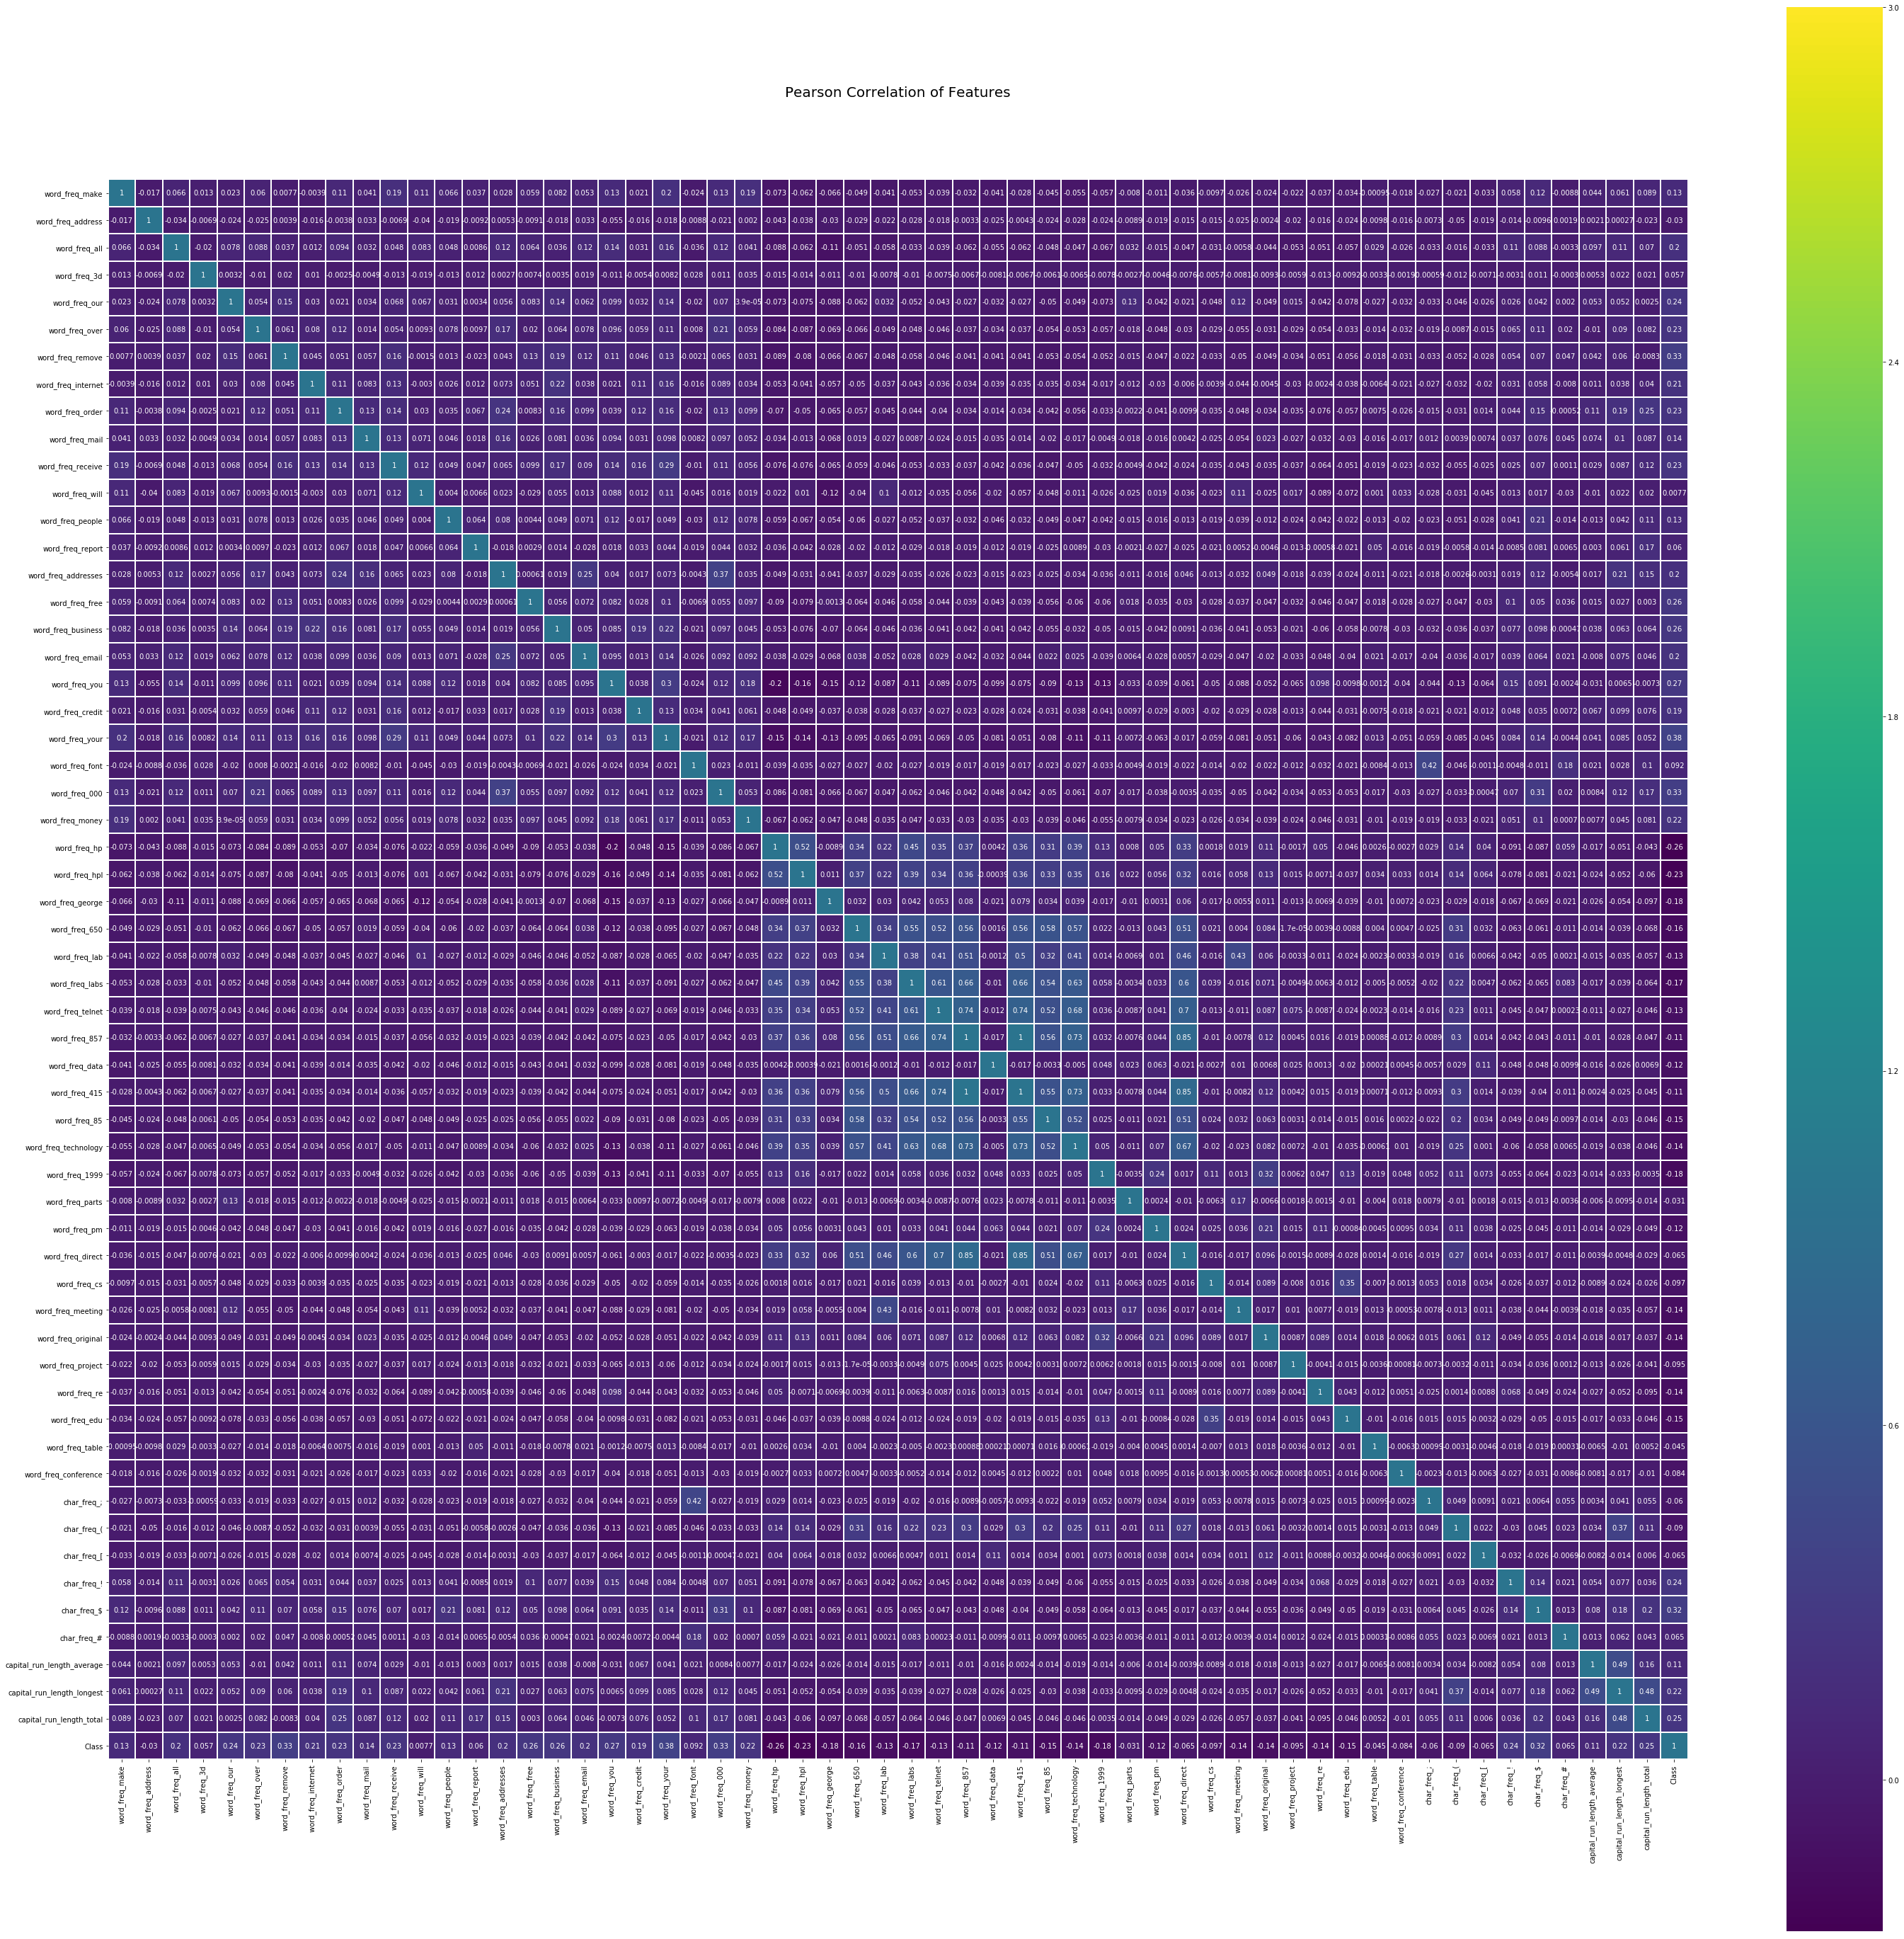

In [10]:
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(50,50))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(df.astype(float).corr(),linewidths=1.0,vmax=3.0, square=True, cmap=colormap, linecolor='white', annot=True)


### CART

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
p= psutil.Process(os.getpid())

def print_mem():
    print("The memory usage for CART is - {:.0f}MB".format(p.memory_info().rss/1e6))

In [19]:
#CART with default parameters
start_training = timeit.default_timer()
clf_dt = DecisionTreeClassifier(criterion='entropy')
clf_dt.fit(X_train, y_train)
stop_training = timeit.default_timer()
train_time1=(stop_training - start_training)
train_score = clf_dt.score(X_train, y_train)*100
test_score = clf_dt.score(X_test, y_test)*100
print("Train score",train_score)
print("Test score",test_score)
print("Training Time in (secs):",train_time1)
print_mem()

Train score 99.96894409937889
Test score 91.81752353367125
Training Time in (secs): 0.05655176699997355
The memory usage for CART is - 220MB


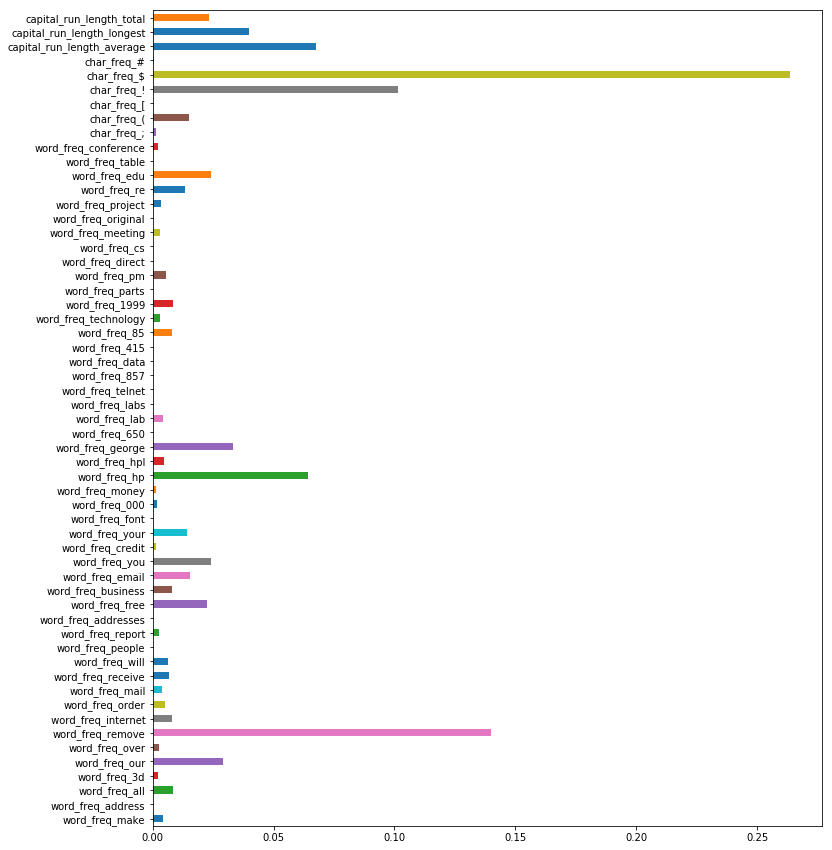

In [20]:
importances=pd.Series(clf_dt.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,15))

In [13]:
#Plotting Decision Tree with default parameters
dot_data = StringIO()
export_graphviz(trees[0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = attributes1,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.set_size('"40,40!"')
graph.write_png('CART.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [12]:
start_classification1 = timeit.default_timer()
y_pred_en_gini = clf_dt.predict(X_test)
y_pred_en_gini
stop_classification1 = timeit.default_timer()
classification_time1=(stop_classification1 - start_classification1)
score1=accuracy_score(y_test,y_pred_en_gini)
score1
m1=mean_squared_error(y_test, y_pred_en_gini)  
print("Accuracy score",score1)
print("Classification Time in (secs):",classification_time1)
m1

Accuracy score 0.9188993482983345
Classification Time in (secs): 0.0018639566649873984


0.08110065170166546

In [13]:
print(confusion_matrix(y_test, y_pred_en_gini))  
print("\t\tConfusion matrix for CART")
print(classification_report(y_test, y_pred_en_gini))

[[752  52]
 [ 60 517]]
		Confusion matrix for CART
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       804
           1       0.91      0.90      0.90       577

   micro avg       0.92      0.92      0.92      1381
   macro avg       0.92      0.92      0.92      1381
weighted avg       0.92      0.92      0.92      1381



In [14]:
count_misclassified1 = (y_test != y_pred_en_gini).sum()
print('Misclassified samples: {}'.format(count_misclassified1))

Misclassified samples: 112


In [7]:
def find_best_clf(n, X, y, classifier, parameters, cv=5):

    best_para = []
    best_tree = []
    train_score = []
    test_score = []
    train_time = []
    classification_time = []
    for i in range(n):
        print("Iteration {}".format(i))
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
        
        gridsearch = GridSearchCV(classifier, parameters, cv=cv, return_train_score=True)
        gridsearch.fit(X_train, y_train)
        grid_search_result = pd.DataFrame(gridsearch.cv_results_ )
        
        optimal_tree = gridsearch.best_estimator_
        ###########################################################
        
        best_para.append(gridsearch.best_params_)
        best_tree.append(optimal_tree)
        test_score.append(optimal_tree.score(X_test, y_test))
        train_score.append(gridsearch.cv_results_['mean_train_score'][gridsearch.best_index_])
        classification_time.append(gridsearch.cv_results_['mean_fit_time'][gridsearch.best_index_])
        train_time.append(gridsearch.cv_results_['mean_fit_time'][gridsearch.best_index_])
        
    return best_para, best_tree, train_score, test_score, train_time, classification_time

In [ ]:
from implementaion.Decisiontree import DecisionTreeNode
# parameters = {"max_depth": [1, 5, 8, 10, 20, 100, 1000, 10000],
#               "min_samples_split": [2, 3, 5, 10, 50, 100, 500, 1000],
#               "min_samples_leaf": [1, 5, 10, 100, 1000, 10000],
#               "max_leaf_nodes": [None, 10, 100, 1000, 10000],
#               }

parameters = {"max_depth": [1, 5, 8, 10, 20, 100, 1000, 10000]}
clf_dt = DecisionTreeNode(max_depth=1, cat_features=[])
best_para, best_tree, train_score, test_score, train_time, classification_time = find_best_clf(10, X, y, clf_dt, parameters)


Iteration 0


In [ ]:
# report average data 

for stats, name in zip([train_score, test_score, train_time, classification_time], ["train_score", "test_score", "train_time", "classification_time"]):
    print("Average {}: {}".format(name, np.average(stats)))



In [57]:
(1-0.9157340355497038) * df.shape[0] * 0.33

127.94354180381826

In [ ]:
print(max(test_score))
idx = test_score.index(max(test_score))
print("best parameters: {}".format(best_para[idx]))

In [17]:
best_tree[idx].tree_.node_count

139

In [6]:
import time
def repeat_clf_n_times(n, X, y, classifier):

    trees = []
    train_score = []
    test_score = []
    train_time = []
    classification_time = []
    
    
    
    
    for i in range(n):
        print("Iteration {}".format(i))
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
        
        start_time = time.time()
        classifier.fit(X_train, y_train)
        tr_time = time.time() - start_time
        
        start_time = time.time()
        y_pred = classifier.predict(X_test)
        cls_time = time.time() - start_time
        
        trees.append(classifier)
        train_score.append(classifier.score(X_train, y_train))
        test_score.append(classifier.score(X_test, y_test))
        
        train_time.append(tr_time)
        classification_time.append(cls_time)
        
        
#         pr, r, fs, _ = precision_recall_fscore_support(y_true=y_test, y_pred=y_pred, labels=labels)
#         precision[i*k+j] = pr[0]
#         recall[i*k+j] = r[0]
#         fmeasure[i*k+j] = fs[0]
        
    return trees, train_score, test_score, train_time, classification_time

In [7]:
clf = DecisionTreeClassifier()
trees, train_score, test_score, train_time, classification_time = repeat_clf_n_times(10, X, y, clf)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9


In [9]:
for stats, name in zip([train_score, test_score, train_time, classification_time], ["train_score", "test_score", "train_time", "classification_time"]):
    print("Average {}: {}".format(name, np.average(stats)))



Average train_score: 0.9995781959766387
Average test_score: 0.9111257406188281
Average train_time: 0.040957975387573245
Average classification_time: 0.001961159706115723


In [56]:
(1-0.9113890717577353) * df.shape[0] * 0.33

134.54063067807775

In [10]:
best_para = gridsearch.best_params_
print(best_para)
for f in best_para.keys():
    fix_para = {x:best_para[x]    for x in best_para.keys() if f != x }
    selected_results=grid_search_result
    for feature in fix_para.keys():
        if fix_para[feature] is None:
            selected_results = selected_results.loc[selected_results['param_'+feature].isnull()]
        else:
            selected_results = selected_results.loc[selected_results['param_'+feature] == fix_para[feature]]
    print(selected_results.shape)
    
    plt.figure()
    plt.plot(selected_results['param_'+f], selected_results['mean_fit_time'])
    plt.xlabel(f)
    plt.ylabel('mean_fit_time')

NameError: name 'gridsearch' is not defined

In [46]:
grid_search_result.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_leaf_nodes', 'param_min_samples_leaf',
       'param_min_samples_split', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'split5_train_score',
       'split6_train_score', 'split7_train_score', 'split8_train_score',
       'split9_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [74]:
grid_search_result.loc[grid_search_result['param_max_leaf_nodes'].isnull()]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.007298,0.000463,0.001203,0.000399,1,None,1,2,"{'max_depth': 1, 'max_leaf_nodes': None, 'min_...",0.777090,...,0.805661,0.794615,0.803658,0.800552,0.798206,0.798206,0.798551,0.798551,0.799828,0.002982
1,0.007103,0.000300,0.001001,0.000005,1,None,1,5,"{'max_depth': 1, 'max_leaf_nodes': None, 'min_...",0.777090,...,0.805661,0.794615,0.803658,0.800552,0.798206,0.798206,0.798551,0.798551,0.799828,0.002982
2,0.007001,0.000005,0.001002,0.000005,1,None,5,2,"{'max_depth': 1, 'max_leaf_nodes': None, 'min_...",0.777090,...,0.805661,0.794615,0.803658,0.800552,0.798206,0.798206,0.798551,0.798551,0.799828,0.002982
3,0.006701,0.000458,0.000900,0.000300,1,None,5,5,"{'max_depth': 1, 'max_leaf_nodes': None, 'min_...",0.777090,...,0.805661,0.794615,0.803658,0.800552,0.798206,0.798206,0.798551,0.798551,0.799828,0.002982
8,0.022904,0.000700,0.001001,0.000003,5,None,1,2,"{'max_depth': 5, 'max_leaf_nodes': None, 'min_...",0.913313,...,0.927511,0.925440,0.924776,0.924431,0.921352,0.924112,0.924457,0.923767,0.924638,0.001780
9,0.023107,0.000834,0.001001,0.000003,5,None,1,5,"{'max_depth': 5, 'max_leaf_nodes': None, 'min_...",0.913313,...,0.927511,0.925095,0.924776,0.924431,0.921352,0.924112,0.924457,0.923767,0.924604,0.001767
10,0.022907,0.000701,0.001099,0.000298,5,None,5,2,"{'max_depth': 5, 'max_leaf_nodes': None, 'min_...",0.913313,...,0.925785,0.922333,0.924431,0.922360,0.920317,0.921007,0.923422,0.922042,0.922913,0.001727
11,0.022606,0.000802,0.001100,0.000300,5,None,5,5,"{'max_depth': 5, 'max_leaf_nodes': None, 'min_...",0.913313,...,0.925785,0.921643,0.924431,0.922360,0.920317,0.921007,0.923422,0.922042,0.922844,0.001762


In [56]:
#K cross and GridDSearchCV() for finding optimal parameters in CART
training_time2 = []
from sklearn.model_selection import cross_val_score
k_range = range(1, 10)
k_scores = []
p= psutil.Process(os.getpid())
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    parameters = {"max_depth": [None, 10, 100, 1000, 10000],
              "min_samples_split": [None, 5, 10, 50, 100, 500, 1000],
              "min_samples_leaf": [None,10, 100, 1000, 10000],
              "max_leaf_nodes": [None, 10, 100, 1000, 10000],
              }
    gridsearch = GridSearchCV(clf_dt, parameters)
    gridsearch.fit(X_train, y_train)
    gridsearch.best_params_
    reg_tree = gridsearch.best_estimator_

    print("Training acc:", reg_tree.score(X_train, y_train), "\nValidation acc:",
      reg_tree.score(X_test, y_test))
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(reg_tree, X_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
    stop2 = timeit.default_timer()
    training_time2.append(stop2 - start_training)


print(k_scores)
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))
print("Training Time in (secs):",np.mean(training_time2))
print_mem()

/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Training acc: 0.9315379623621025 
Validation acc: 0.9190256747860435


/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Training acc: 0.9315379623621025 
Validation acc: 0.9190256747860435


/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Training acc: 0.9315379623621025 
Validation acc: 0.9190256747860435


/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Training acc: 0.9315379623621025 
Validation acc: 0.9190256747860435


/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Training acc: 0.9315379623621025 
Validation acc: 0.9190256747860435


/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Training acc: 0.9295911745619727 
Validation acc: 0.9170506912442397


/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Training acc: 0.9295911745619727 
Validation acc: 0.9170506912442397


/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Training acc: 0.9315379623621025 
Validation acc: 0.9190256747860435


/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Training acc: 0.9295911745619727 
Validation acc: 0.9170506912442397
[0.9052778128020845, 0.9052778128020845, 0.9052778128020845, 0.9052778128020845, 0.9052778128020845, 0.9098201151599211, 0.9091707645105703, 0.9059271634514353, 0.9098201151599211]
Length of list 9
Max of list 0.9098201151599211
Training Time in (secs): 283.1729682404441
The memory usage for CART is- 233MB


In [57]:
#Best params
gridsearch.best_params_

{'max_depth': 10,
 'max_leaf_nodes': None,
 'min_samples_leaf': 10,
 'min_samples_split': 50}

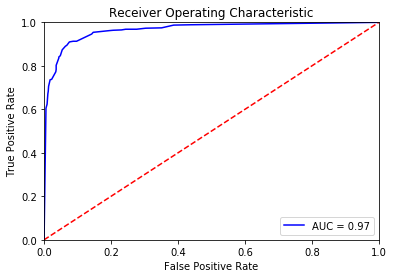

In [58]:
#CART with optimal parameters
reg_tree.fit(X_train, y_train)
tree_preds = reg_tree.predict_proba(X_test)[:, 1]
fpr, tpr, threshold  = roc_curve(y_test, tree_preds)
roc_auc = auc(fpr, tpr)
#roc_score=roc_auc_score(fpr, tpr)
#print("ROC area is:",roc_score)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


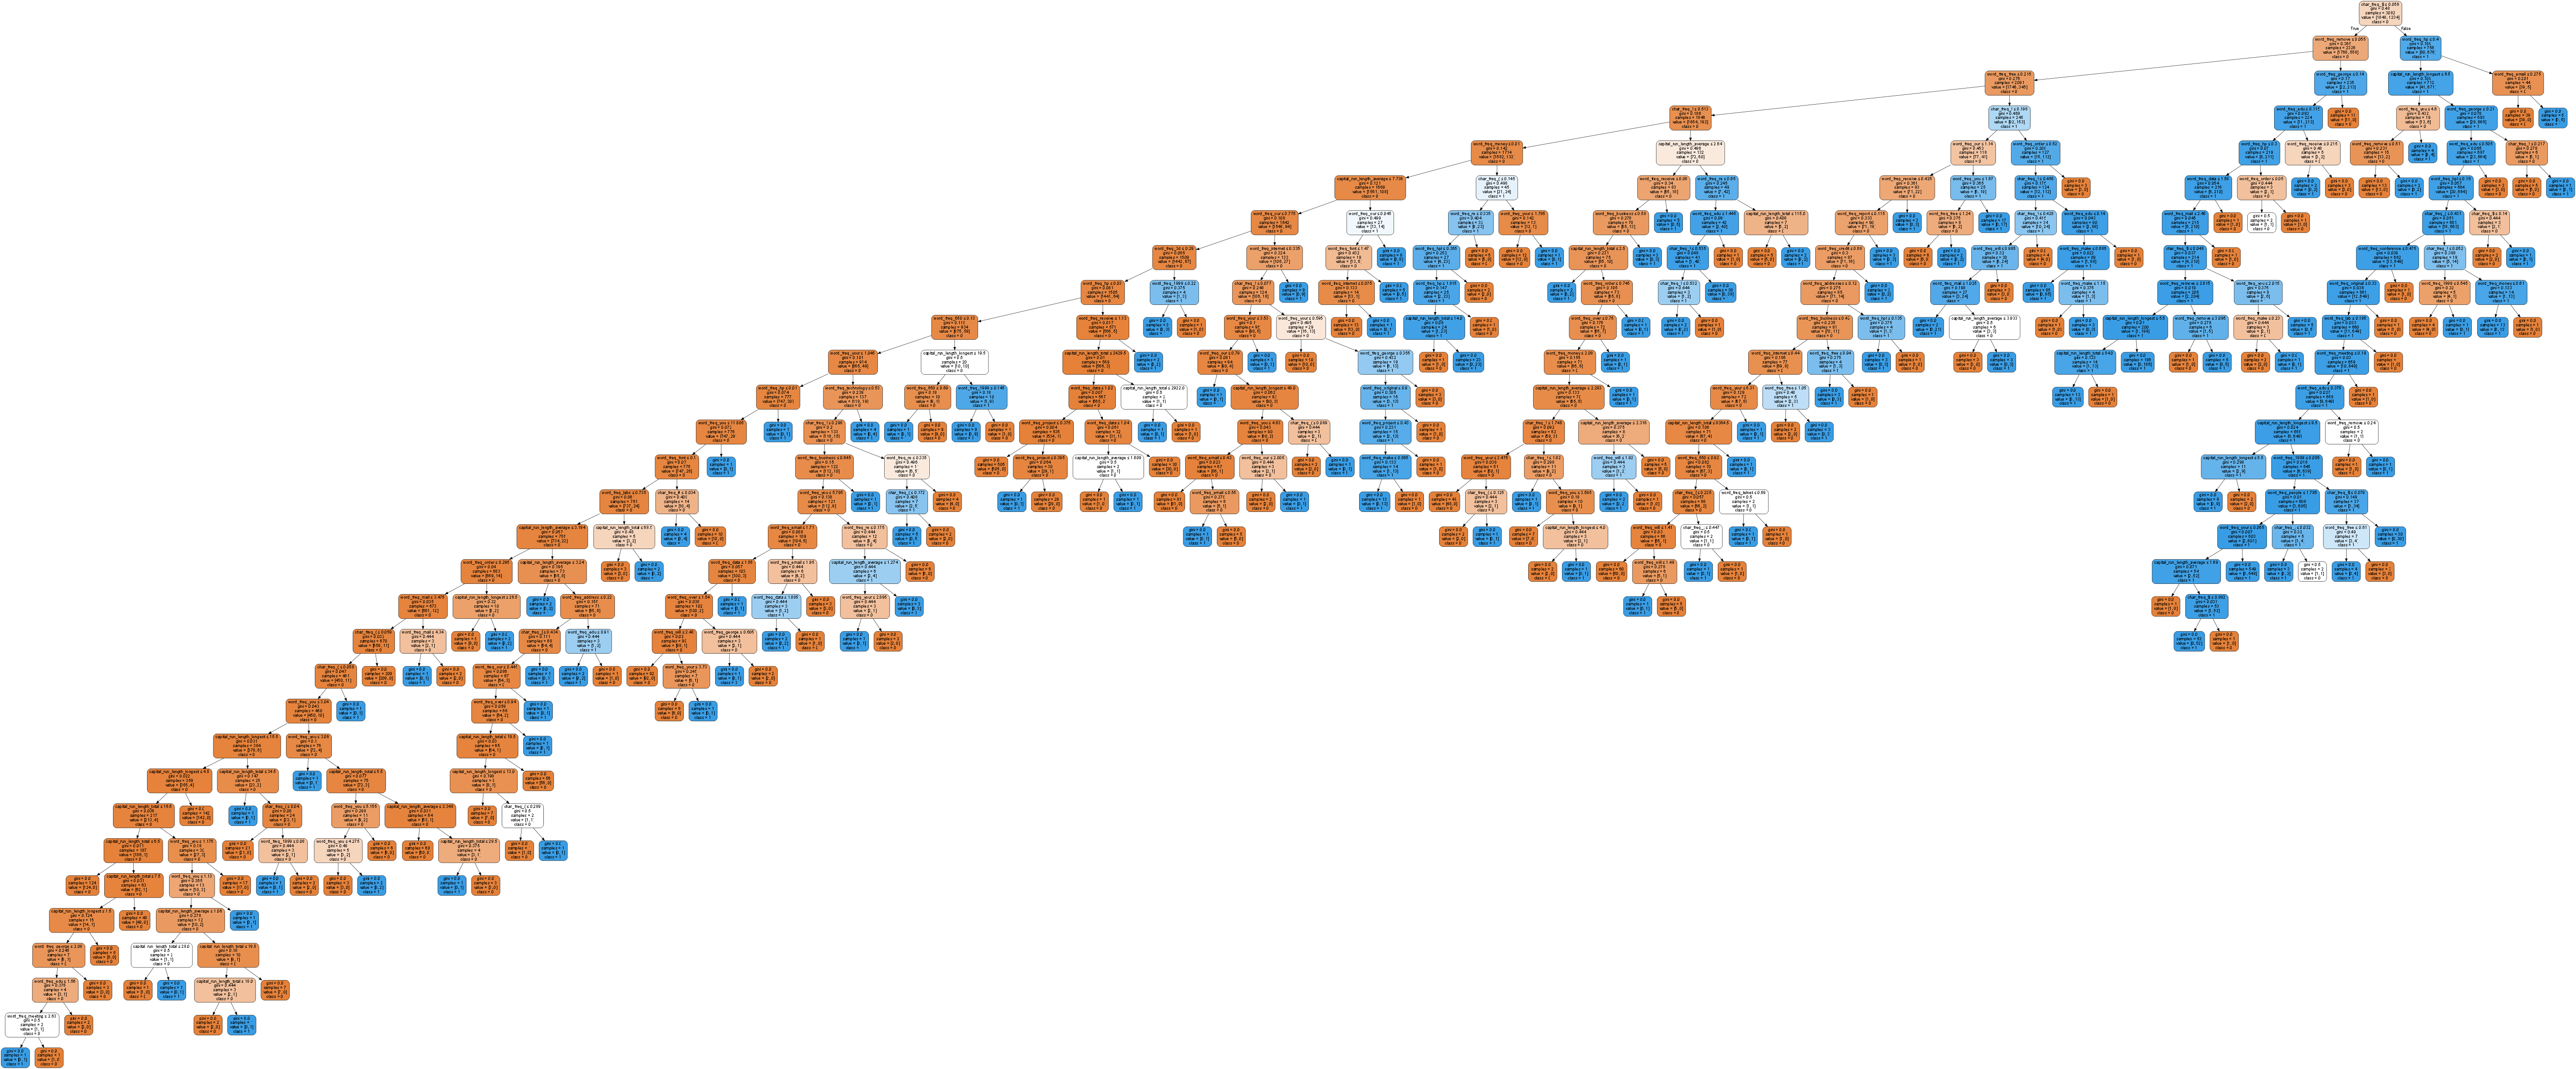

In [11]:
#Decision tree with optimal parameters
dot_data = StringIO()
export_graphviz(trees[1], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = attributes1,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.set_size('"60,60!"')
graph.write_png('CART_optimal.png')
Image(graph.create_png())

In [115]:
start_classification2=timeit.default_timer()
y_pred = reg_tree.predict(X_test)
y_pred
stop_classification2=timeit.default_timer()
classification_time2=stop_classification2-start_classification2
score2=accuracy_score(y_test,y_pred)
score2
m2=mean_squared_error(y_test, y_pred)  
print("Accuracy score",score2)
print("Classification Time in (secs):",classification_time2)
m2

Accuracy score 0.9098090849242922
Classification Time in (secs): 0.0037885339988861233


0.0901909150757077

In [116]:
print(confusion_matrix(y_test, y_pred))  
print("\tConfusion matrix for CART with optimal parametres")
print(classification_report(y_test, y_pred))

[[835  51]
 [ 86 547]]
	Confusion matrix for CART with optimal parametres
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       886
           1       0.91      0.86      0.89       633

   micro avg       0.91      0.91      0.91      1519
   macro avg       0.91      0.90      0.91      1519
weighted avg       0.91      0.91      0.91      1519



In [117]:
count_misclassified2 = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified2))

Misclassified samples: 137


In [51]:
# CART with max_depth
p= psutil.Process(os.getpid())
start_train3=timeit.default_timer()
clf_dt2 = DecisionTreeClassifier(max_depth=10)
clf_dt2.fit(X_train, y_train)
stop_train3=timeit.default_timer()
train_time3=stop_train3-start_train3
train_score = clf_dt2.score(X_train, y_train)*100
test_score = clf_dt2.score(X_test, y_test)*100
print("Train score",train_score)
print("Test score",test_score)
print("Training Time in (secs):",train_time3)
print_mem()

Train score 97.04737183646982
Test score 91.37590520079
Training Time in (secs): 0.03940180099925783
The memory usage for CART is- 274MB


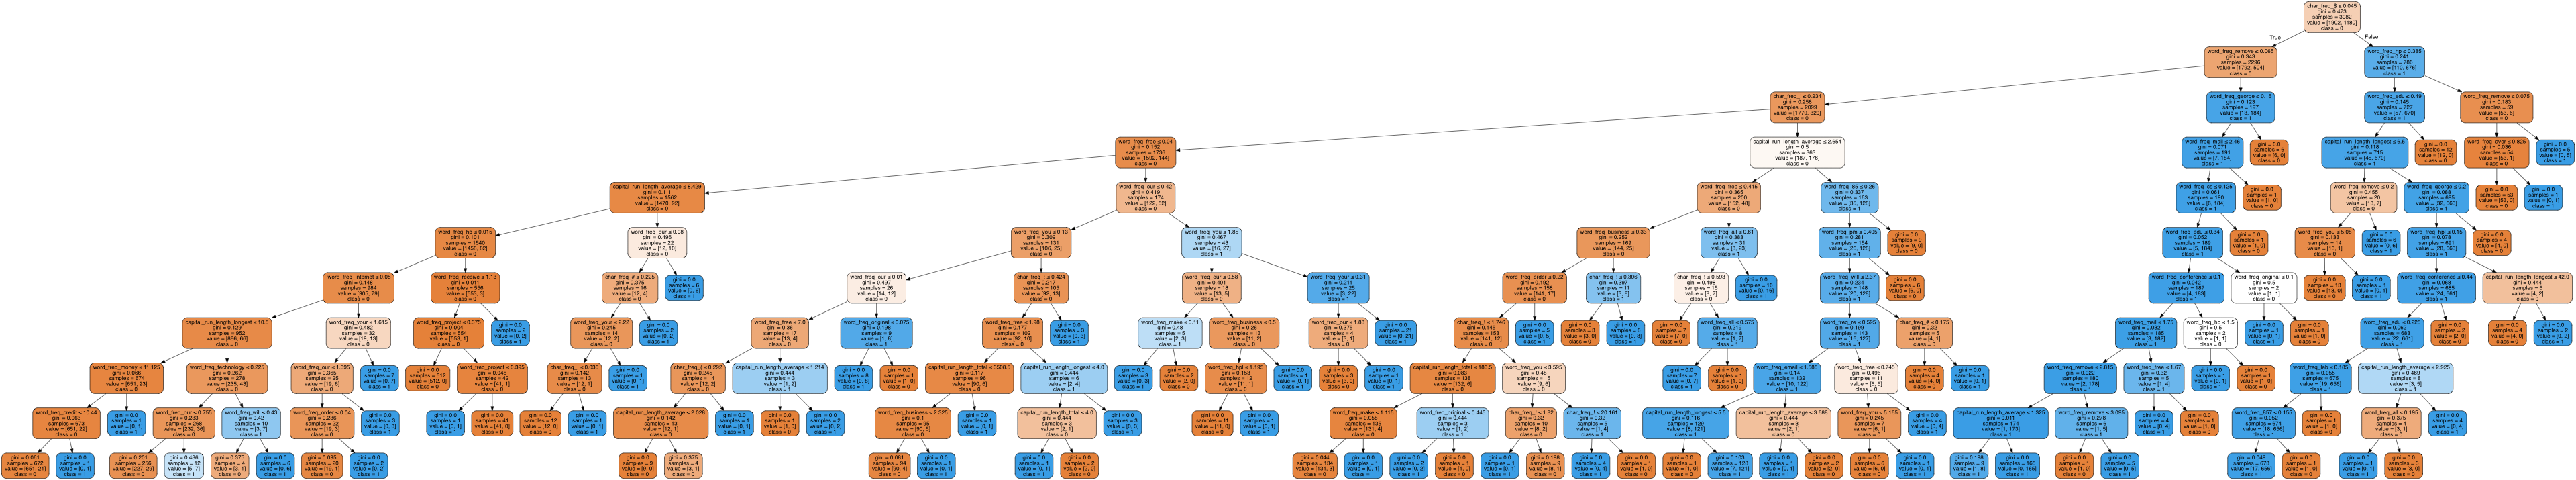

In [34]:
dot_data = StringIO()
export_graphviz(clf_dt2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = attributes1,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.set_size('"40,40!"')
graph.write_png('CART_max_depth.png')
Image(graph.create_png())

In [118]:
start_classification3=timeit.default_timer()
y_pred2 = clf_dt2.predict(X_test)
y_pred2
stop_classification3=timeit.default_timer()
Classificationt3=stop_classification3-start_classification3
score3=accuracy_score(y_test,y_pred2)
m3=mean_squared_error(y_test, y_pred)  
print("Accuracy score",score3)
print("Classification Time in (secs):",train_time3)
m3

Accuracy score 0.9815668202764977
Classification Time in (secs): 0.03940180099925783


0.0901909150757077

In [120]:
print(confusion_matrix(y_test, y_pred2))  
print("\tClassification_report for CART with max_depth")
print(classification_report(y_test, y_pred2))


[[875  11]
 [ 17 616]]
	Classification_report for CART with max_depth
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       886
           1       0.98      0.97      0.98       633

   micro avg       0.98      0.98      0.98      1519
   macro avg       0.98      0.98      0.98      1519
weighted avg       0.98      0.98      0.98      1519



In [121]:
count_misclassified3 = (y_test != y_pred2).sum()
print('Misclassified samples: {}'.format(count_misclassified3))

Misclassified samples: 28


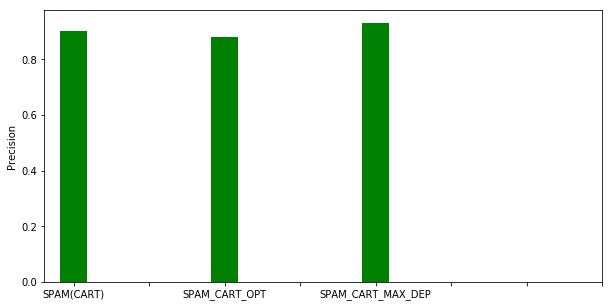

In [37]:
n_groups = 8
clf_spam = [0.90, 0.88, 0.93]
fig, ax = plt.subplots(figsize=(10,5))

index = np.arange(n_groups)
bar_width = 0.35
dt_CART_yes = plt.bar(index[0] + bar_width, clf_spam[0], bar_width, color='g', label='Yes')

dt_CARTop_yes = plt.bar(index[2] + bar_width, clf_spam[1], bar_width, color='g', label='Yes')


dt_CARTmaxDep_yes = plt.bar(index[4] + bar_width, clf_spam[2], bar_width, color='g', label='Yes')

ax.set_ylabel('Precision')
plt.xticks(index + bar_width, ('SPAM(CART)','', 'SPAM_CART_OPT', '','SPAM_CART_MAX_DEP'))
plt.show()

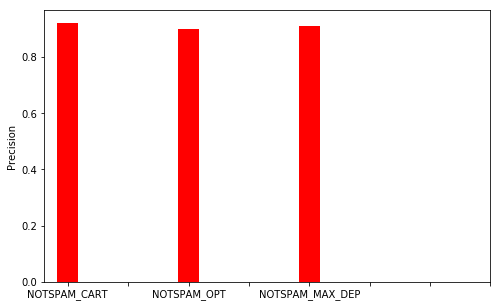

In [38]:
n_groups = 8
clf_notspam = [0.92,0.90, 0.91]
fig, ax = plt.subplots(figsize=(8,5))

index = np.arange(n_groups)
bar_width = 0.35

dt_CART_no = plt.bar(index[0] + bar_width, clf_notspam[0], bar_width, color='r', label='No')


dt_CARTop_no = plt.bar(index[2] + bar_width, clf_notspam[1], bar_width, color='r', label='No')

dt_CARTmaxDep_no = plt.bar(index[4] + bar_width, clf_notspam[2], bar_width, color='r', label='No')

ax.set_ylabel('Precision')
plt.xticks(index + bar_width, ('NOTSPAM_CART','', 'NOTSPAM_OPT', '','NOTSPAM_MAX_DEP'))
plt.show()

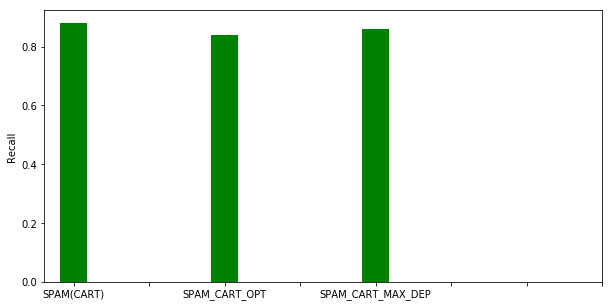

In [39]:
n_groups = 8
clf_spam = [0.88, 0.84, 0.86]
fig, ax = plt.subplots(figsize=(10,5))

index = np.arange(n_groups)
bar_width = 0.35
dt_CART_yes = plt.bar(index[0] + bar_width, clf_spam[0], bar_width, color='g', label='Yes')

dt_CARTop_yes = plt.bar(index[2] + bar_width, clf_spam[1], bar_width, color='g', label='Yes')


dt_CARTmaxDep_yes = plt.bar(index[4] + bar_width, clf_spam[2], bar_width, color='g', label='Yes')

ax.set_ylabel('Recall')
plt.xticks(index + bar_width, ('SPAM(CART)','', 'SPAM_CART_OPT', '','SPAM_CART_MAX_DEP'))
plt.show()

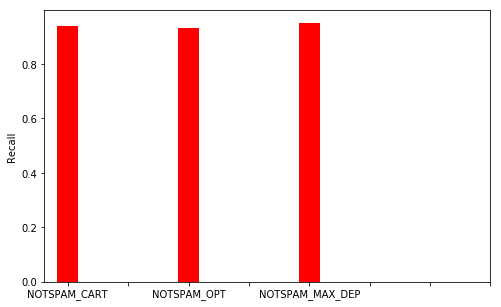

In [40]:
n_groups = 8
clf_notspam = [0.94,0.93, 0.95]
fig, ax = plt.subplots(figsize=(8,5))

index = np.arange(n_groups)
bar_width = 0.35

dt_CART_no = plt.bar(index[0] + bar_width, clf_notspam[0], bar_width, color='r', label='No')


dt_CARTop_no = plt.bar(index[2] + bar_width, clf_notspam[1], bar_width, color='r', label='No')

dt_CARTmaxDep_no = plt.bar(index[4] + bar_width, clf_notspam[2], bar_width, color='r', label='No')

ax.set_ylabel('Recall')
plt.xticks(index + bar_width, ('NOTSPAM_CART','', 'NOTSPAM_OPT', '','NOTSPAM_MAX_DEP'))
plt.show()

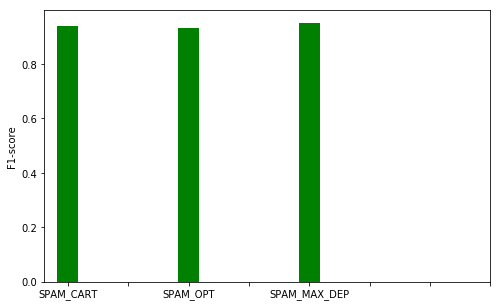

In [41]:
n_groups = 8
clf_spam = [0.90,0.86, 0.89]
fig, ax = plt.subplots(figsize=(8,5))

index = np.arange(n_groups)
bar_width = 0.35

dt_CART_no = plt.bar(index[0] + bar_width, clf_notspam[0], bar_width, color='g', label='No')


dt_CARTop_no = plt.bar(index[2] + bar_width, clf_notspam[1], bar_width, color='g', label='No')

dt_CARTmaxDep_no = plt.bar(index[4] + bar_width, clf_notspam[2], bar_width, color='g', label='No')

ax.set_ylabel('F1-score')
plt.xticks(index + bar_width, ('SPAM_CART','', 'SPAM_OPT', '','SPAM_MAX_DEP'))
plt.show()

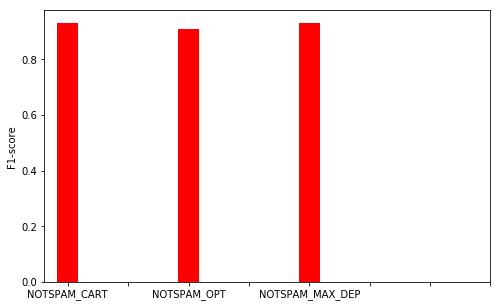

In [42]:
n_groups = 8
clf_notspam = [0.93,0.91, 0.93]
fig, ax = plt.subplots(figsize=(8,5))

index = np.arange(n_groups)
bar_width = 0.35

dt_CART_no = plt.bar(index[0] + bar_width, clf_notspam[0], bar_width, color='r', label='No')


dt_CARTop_no = plt.bar(index[2] + bar_width, clf_notspam[1], bar_width, color='r', label='No')

dt_CARTmaxDep_no = plt.bar(index[4] + bar_width, clf_notspam[2], bar_width, color='r', label='No')

ax.set_ylabel('F1-score')
plt.xticks(index + bar_width, ('NOTSPAM_CART','', 'NOTSPAM_OPT', '','NOTSPAM_MAX_DEP'))
plt.show()

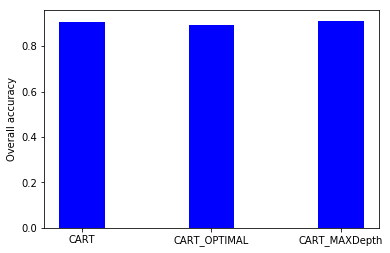

In [43]:
n_groups = 3
clf_accuracy = [score1,score2,score3]
fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35
dt_CART_yes = plt.bar(index[0] + bar_width, clf_accuracy[0], bar_width, color='b')

dt_C45_yes = plt.bar(index[1] + bar_width, clf_accuracy[1], bar_width, color='b')

rf_yes = plt.bar(index[2] + bar_width, clf_accuracy[2], bar_width, color='b')



ax.set_ylabel('Overall accuracy')
plt.xticks(index + bar_width, ('CART', 'CART_OPTIMAL', 'CART_MAXDepth'))
plt.show()



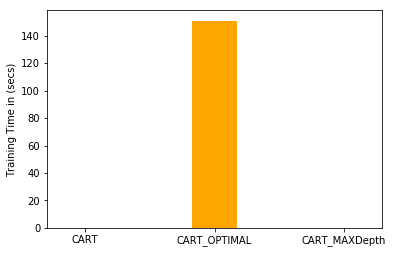

In [44]:
n_groups = 3
clf_accuracy = [train_time1,np.mean(training_time2),train_time1]
fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35
dt_CART_yes = plt.bar(index[0] + bar_width, clf_accuracy[0], bar_width, color='orange')

dt_C45_yes = plt.bar(index[1] + bar_width, clf_accuracy[1], bar_width, color='orange')

rf_yes = plt.bar(index[2] + bar_width, clf_accuracy[2], bar_width, color='orange')



ax.set_ylabel('Training Time in (secs)')
plt.xticks(index + bar_width, ('CART', 'CART_OPTIMAL', 'CART_MAXDepth'))
plt.show()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
4388,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.112,0.000,0.000,0.903,0.000,2.285,14,80
2241,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.058,0.000,0.000,0.058,0.058,1.755,9,79
1605,0.40,0.18,0.32,0.0,0.25,0.18,0.03,1.01,0.40,0.40,...,0.0,0.012,0.042,0.072,0.334,0.139,0.000,3.305,181,1613
776,0.00,0.00,0.00,0.0,3.98,0.44,0.00,0.44,0.00,0.88,...,0.0,0.000,0.257,0.000,0.064,0.128,0.000,2.215,23,113
2694,0.00,0.00,0.00,0.0,0.51,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.281,0.000,0.000,1.363,5,45
55,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,1.478,0.000,0.000,2.000,30,106
76,0.00,0.00,1.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.165,0.000,0.165,0.082,0.000,2.325,16,100
991,0.10,0.20,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,...,0.0,0.000,0.111,0.000,0.491,0.158,0.015,8.550,669,1351
1244,0.00,0.00,0.00,0.0,0.00,0.63,0.63,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.613,0.000,1.251,12,174
959,0.00,0.00,1.31,0.0,2.63,0.00,0.00,0.65,0.00,0.00,...,0.0,0.000,0.198,0.000,0.198,0.099,0.000,2.195,12,101


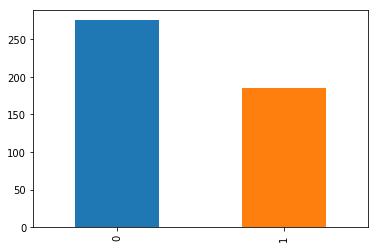

In [96]:
df_subset = df.sample(frac=0.1)
df_subset['Class'].value_counts().plot.bar()
X1=df_subset.iloc[:,:-1]
y1=df_subset.iloc[:,-1]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=42)
df_subset2 = X_train1.sample(frac=0.09)
df_subset2

### Random Forest

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=10)
clf_rf.fit(X_train, y_train)
train_score = clf_rf.score(X_train, y_train)*100
test_score = clf_rf.score(X_test, y_test)*100
print("Train score",train_score)
print("Test score",test_score)

In [ ]:
y_pred_rf = clf_rf.predict(X_test)
y_pred_rf
accuracy_score(y_test,y_pred_rf)

In [ ]:
print(confusion_matrix(y_test, y_pred_rf))  
print("\tConfusion matrix for Random Forest")
print(classification_report(y_test, y_pred_rf))

In [ ]:
from sklearn.model_selection import cross_val_score
k_range = range(1, 10)
k_scores = []
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    parameters = {"max_depth": [None, 10, 100, 1000, 10000],
              "min_samples_split": [5, 10, 50, 100, 500, 1000],
              "min_samples_leaf": [10, 100, 1000, 10000],
              "max_leaf_nodes": [None, 10, 100, 1000, 10000],
              }
    gridsearch = GridSearchCV(clf_rf, parameters)
    gridsearch.fit(X_train, y_train)
    gridsearch.best_params_
    reg_tree = gridsearch.best_estimator_

    print("Training acc:", reg_tree.score(X_train, y_train), "\nValidation acc:",
      reg_tree.score(X_test, y_test))
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(reg_tree, X_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

In [ ]:
gridsearch.best_params_

In [ ]:
reg_tree.fit(X_train, y_train)
tree_preds1 = reg_tree.predict_proba(X_test)[:, 1]
fpr1, tpr1, threshold1  = roc_curve(y_test, tree_preds1)
roc_auc1 = auc(fpr1, tpr1)
#roc_score=roc_auc_score(fpr, tpr)
#print("ROC area is:",roc_score)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_pred1 = reg_tree.predict(X_test)
y_pred1
accuracy_score(y_test,y_pred1)

In [ ]:
print(confusion_matrix(y_test, y_pred1))  
print("\tConfusion matrix for c4.5 with optimal parametres")
print(classification_report(y_test, y_pred1))

In [ ]:
clf_rf2 = DecisionTreeClassifier(max_depth=None)
clf_rf2.fit(X_train, y_train)
train_score = clf_rf2.score(X_train, y_train)*100
test_score = clf_rf2.score(X_test, y_test)*100
print("Train score",train_score)
print("Test score",test_score)

In [ ]:
y_pred_rf2 = clf_rf2.predict(X_test)
y_pred_rf2
accuracy_score(y_test,y_pred_rf2)

In [ ]:
print(confusion_matrix(y_test, y_pred_rf2))  
print("\tConfusion matrix for Random Forest with max_depth")
print(classification_report(y_test, y_pred_rf2))

In [ ]:
from sklearn.ensemble import *
from sklearn.tree import *
clf_gradient = GradientBoostingClassifier()
clf_gradient.fit(X_train, y_train)
train_score=clf_gradient.score(X_train,y_train)
test_score=clf_gradient.score(X_test,y_test)
print("Train score",train_score)
print("Test score",test_score)

In [ ]:
y_pred_gb = clf_gradient.predict(X_test)
y_pred_gb
accuracy_score(y_test,y_pred_gb)

In [ ]:
print(confusion_matrix(y_test, y_pred_gb))  
print("\tConfusion matrix for Gradient Boosting with max_depth")
print(classification_report(y_test, y_pred_gb))

In [ ]:

data, labels = readingfile('spam_dataset.csv')
tree = createTree(data, labels)

In [ ]:
df.to_csv("spam_dataset.csv")

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
X.shape
clf_dt.feature_importances_  
model = SelectFromModel(clf_dt, prefit=True)
X_new = model.transform(X)
X_new.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)

In [ ]:
clf_dt1 = DecisionTreeClassifier(max_depth=None)
clf_dt1.fit(X_train, y_train)
train_score = clf_dt1.score(X_train, y_train)*100
test_score = clf_dt1.score(X_test, y_test)*100
print("Train score",train_score)
print("Test score",test_score)

In [ ]:
y_pred_gb = clf_dt1.predict(X_test)
y_pred_gb
accuracy_score(y_test,y_pred_gb)

In [64]:
start_training = timeit.default_timer()
clf_dt4 = DecisionTreeClassifier(criterion='entropy')
clf_dt4.fit(X_test, y_test)
stop_training = timeit.default_timer()
train_time1=(stop_training - start_training)
# train_score = clf_dt.score(X_train, y_train)*100
# test_score = clf_dt.score(X_test, y_test)*100
# print("Train score",train_score)
# print("Test score",test_score)
print("Training Time in (secs):",train_time1)
print_mem()

Training Time in (secs): 0.02202332599881629
The memory usage for CART is- 229MB


In [98]:
y_pred_en_gini4 = clf_dt4.predict(X_test)
y_pred_en_gini4

score4=accuracy_score(y_test,y_pred_en_gini4)
score4

1.0

In [99]:
start_training = timeit.default_timer()

reg_tree.fit(X_test, y_test)
stop_training = timeit.default_timer()
train_time1=(stop_training - start_training)
# train_score = clf_dt.score(X_train, y_train)*100
# test_score = clf_dt.score(X_test, y_test)*100
# print("Train score",train_score)
# print("Test score",test_score)
print("Training Time in (secs):",train_time1)
print_mem()

Training Time in (secs): 0.020606190999387763
The memory usage for CART is- 102MB


In [100]:
y_pred_en_gini4 = reg_tree.predict(X_test)
y_pred_en_gini4

score4=accuracy_score(y_test,y_pred_en_gini4)
score4

0.9098090849242922

In [101]:
start_training = timeit.default_timer()

clf_dt2.fit(X_test, y_test)
stop_training = timeit.default_timer()
train_time1=(stop_training - start_training)
# train_score = clf_dt.score(X_train, y_train)*100
# test_score = clf_dt.score(X_test, y_test)*100
# print("Train score",train_score)
# print("Test score",test_score)
print("Training Time in (secs):",train_time1)
print_mem()

Training Time in (secs): 0.02247636099855299
The memory usage for CART is- 96MB


In [103]:
y_pred_en_gini4 = clf_dt2.predict(X_test)
y_pred_en_gini4

score4=accuracy_score(y_test,y_pred_en_gini4)
score4

0.9815668202764977